In [1]:
# Base libs and modules import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization

In [3]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices()[2])

name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4954920064
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2266910163782204702
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"



In [4]:
# Distribution of the dataset into training and test samples

In [5]:
(x_train, label_train), (x_test, label_test) = fashion_mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
# Normalizatoin dataset

In [8]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype("float32") / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype("float32") / 255

In [9]:
# Intro train dataset

In [10]:
label_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

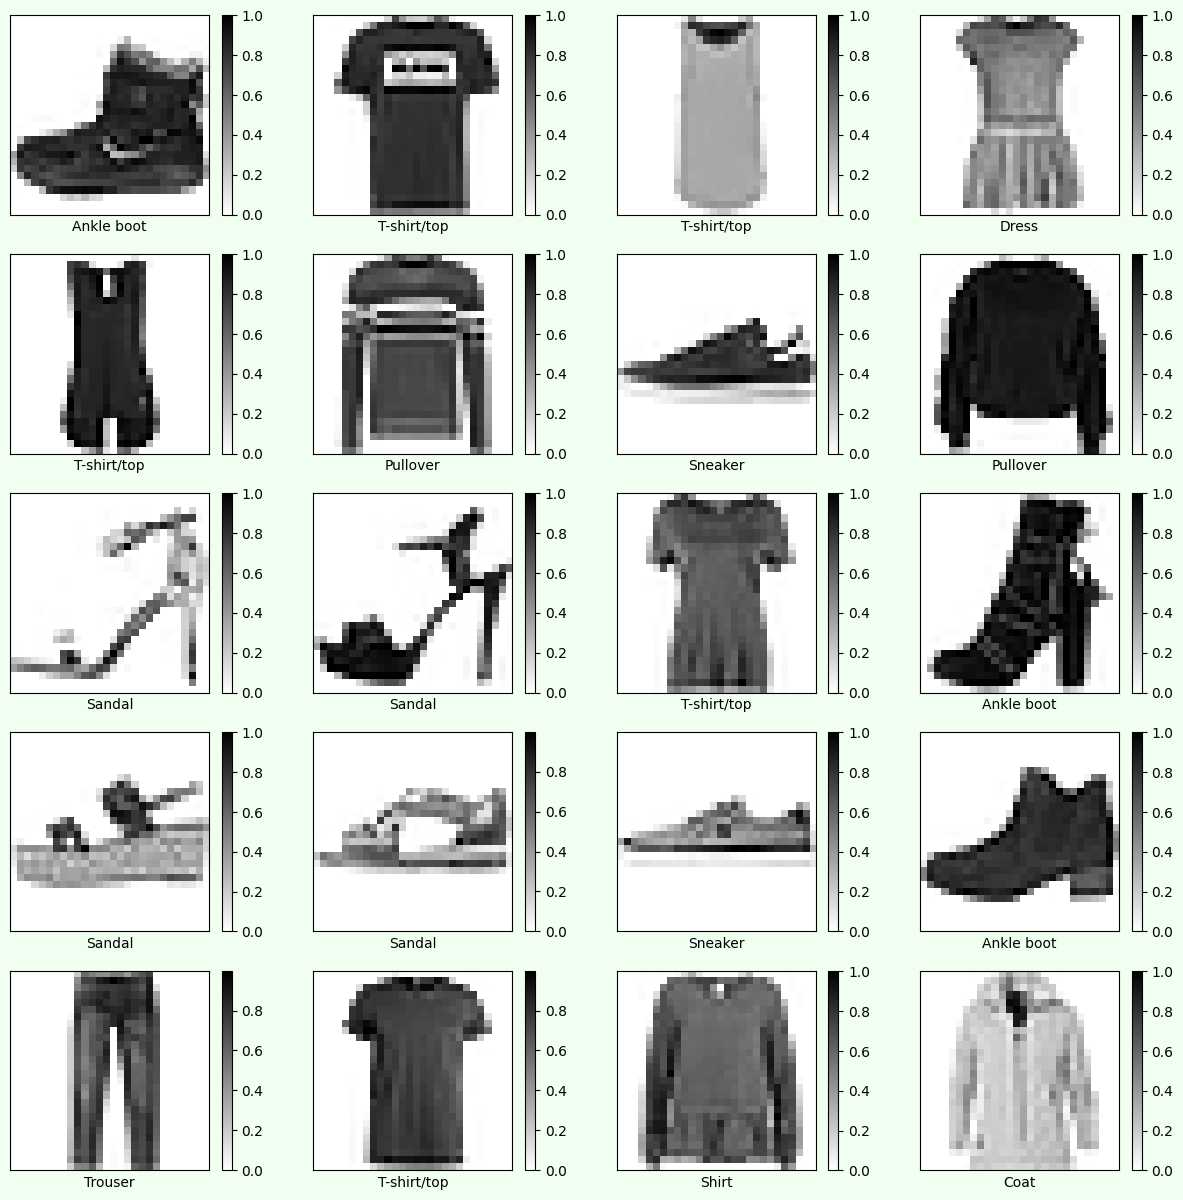

In [27]:
plt.figure(figsize=(15, 15), facecolor='HoneyDew')
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.xlabel(label_name[label_train[i]])

In [12]:
# Create neural network model

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(128, (3,3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
# Compile model NN

In [15]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 5, 128)         512       
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [17]:
# Learning model NN

In [18]:
batch_size = 512
epochs = 50
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [19]:
history=model.fit(
    x_train,
    label_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=early_stop
)

Epoch 1/50
106/106 [==============================] - 2s 18ms/step - loss: 1.3265 - accuracy: 0.6488 - val_loss: 1.9561 - val_accuracy: 0.4717
Epoch 2/50
106/106 [==============================] - 2s 15ms/step - loss: 0.9026 - accuracy: 0.8008 - val_loss: 1.4829 - val_accuracy: 0.7587
Epoch 3/50
106/106 [==============================] - 2s 15ms/step - loss: 0.7731 - accuracy: 0.8394 - val_loss: 1.0335 - val_accuracy: 0.8365
Epoch 4/50
106/106 [==============================] - 2s 15ms/step - loss: 0.6833 - accuracy: 0.8656 - val_loss: 0.7549 - val_accuracy: 0.8662
Epoch 5/50
106/106 [==============================] - 2s 15ms/step - loss: 0.6181 - accuracy: 0.8779 - val_loss: 0.6161 - val_accuracy: 0.8810
Epoch 6/50
106/106 [==============================] - 2s 15ms/step - loss: 0.5669 - accuracy: 0.8862 - val_loss: 0.5498 - val_accuracy: 0.8855
Epoch 7/50
106/106 [==============================] - 2s 15ms/step - loss: 0.5260 - accuracy: 0.8937 - val_loss: 0.5104 - val_accuracy: 0.8900

In [20]:
# Model results

In [21]:
results = model.evaluate(x_test, label_test)
print(f'Model Loss: {round(results[0], 3)} \nModel Accuracy: {round(results[1], 3)}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2715 - accuracy: 0.9228
Model Loss: 0.271 
Model Accuracy: 0.923


In [22]:
# Plot train and validation data

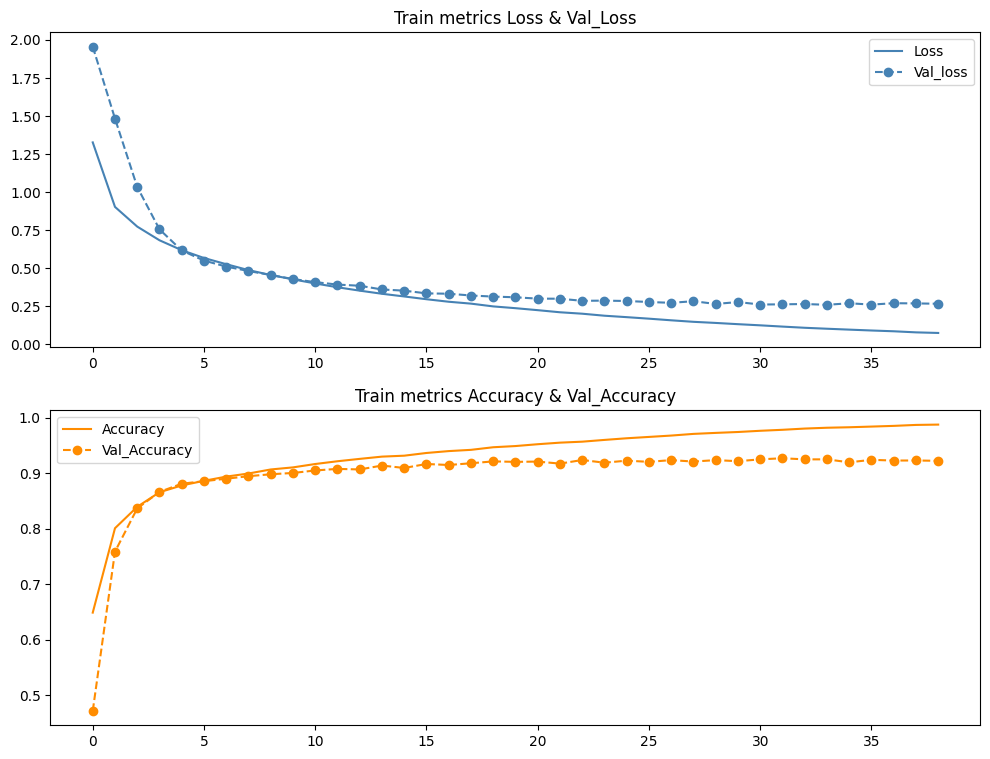

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(12, 9))


axes[0].set_title('Train metrics Loss & Val_Loss')
axes[0].plot(history.history['loss'], label='Loss', color='SteelBlue')
axes[0].plot(history.history['val_loss'], label='Val_loss', marker='o', linestyle='--', color='SteelBlue')
axes[0].legend()

axes[1].set_title('Train metrics Accuracy & Val_Accuracy')
axes[1].plot(history.history['accuracy'], label='Accuracy', color='DarkOrange')
axes[1].plot(history.history['val_accuracy'], label='Val_Accuracy', marker='o', linestyle='--', color='DarkOrange')
axes[1].legend()

plt.show()

In [24]:
# Predict model NN

In [25]:
predict=model.predict(x_test)

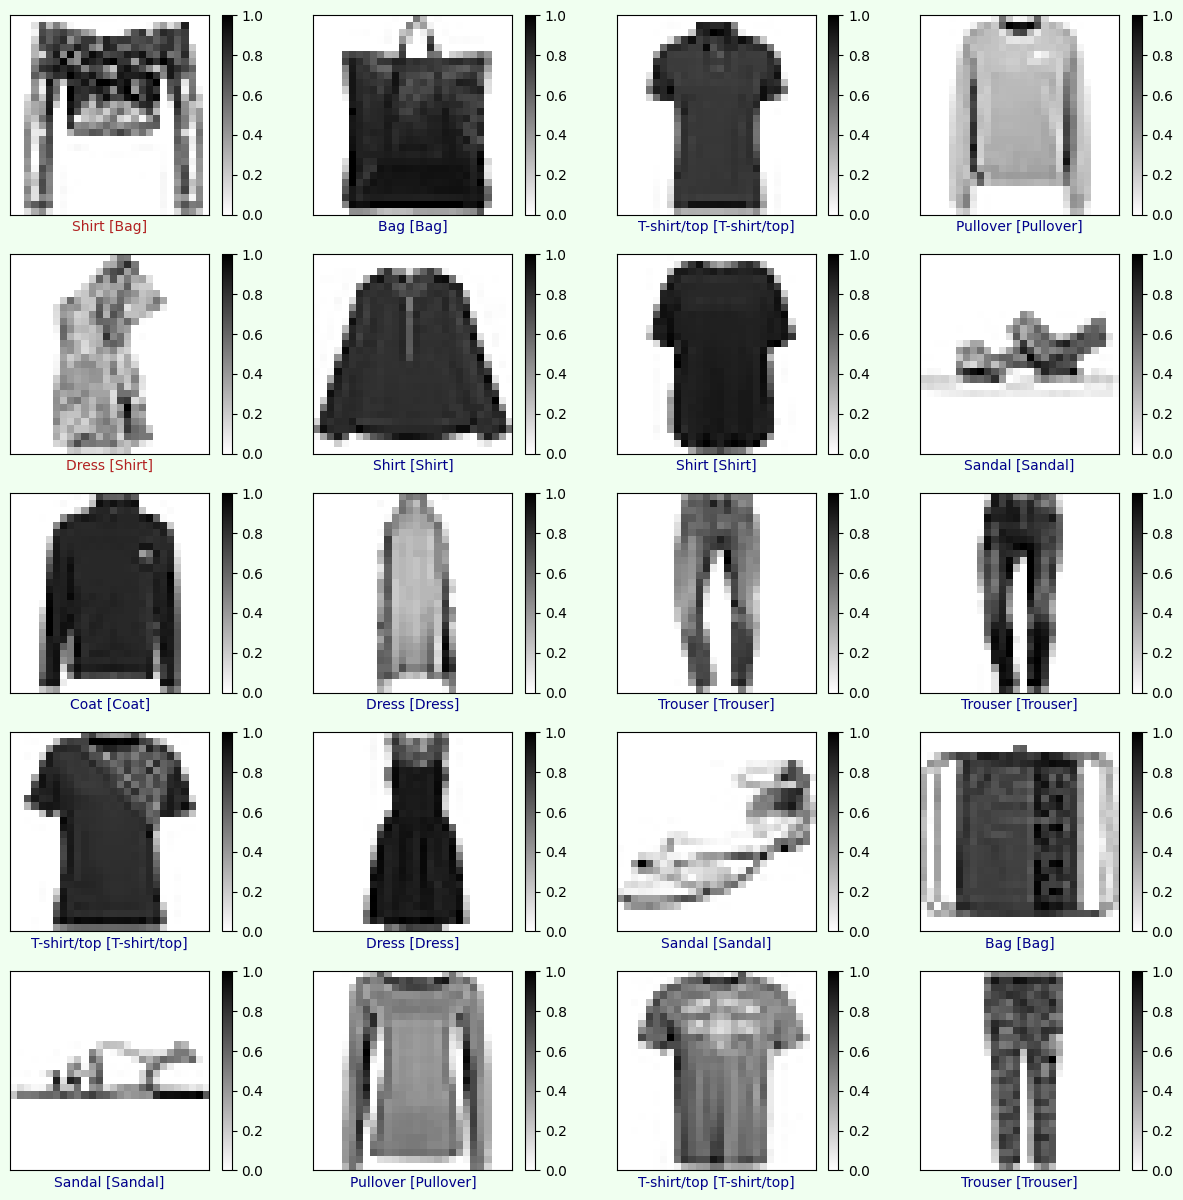

In [29]:
random_indexes = np.random.choice(len(x_test), size=20, replace=False)

plt.figure(figsize=(15, 15), facecolor='HoneyDew')

for i in range(len(random_indexes)):
    
    index = random_indexes[i]
    
    pred_label = label_name[np.argmax(predict[index])]
    true_label = label_name[label_test[index]]
    
    if pred_label == true_label:
        color = "DarkBlue"
    else:
        color = "FireBrick"
    
    plt.subplot(5,4,i+1)
    plt.imshow(x_test[index], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    
    plt.xlabel("{} [{}]".format(true_label, pred_label), color=color)